In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-75.77570196029517 158.4414765616567
75.19808279548172 53.32695705550461
-37.81760442343363 -76.50729868146341
-25.261678021935353 48.320962331909755
-38.15570773391939 150.7475991807073
-30.87447198022415 -104.48901773637081
-77.73851514186833 108.14815622777473
81.0356442250706 -113.66890203785978
66.76830881324133 -116.6567462544829
62.513195169705426 -121.79505846673216
-0.12663394071468304 -20.717832895918463
-28.141159373685916 52.59179723802228
-88.0747230367773 -67.0784012234053
-59.65928063107643 28.562606275306678
-21.05629371806107 121.91076441675273
-18.130212966153493 65.38372545257928
-52.900451443127515 155.05713982925192
39.69802460321671 -123.859688452743
-15.494530908323796 82.96760954991157
-20.205542592043983 127.66396785384757
-51.00956888936693 -26.115991576123406
46.46308617754087 49.253245504304175
-17.83509904883023 -63.04723044130968
83.68102123618456 0.20697918594439102
-80.70080234573197 73.41072129814867
-86.07621559188244 -7.828636538610397
70.162593206838

86.96884236916242 -163.09126474298878
72.87647275331253 11.923136261633033
62.018429575784154 174.78428591151908
74.30164900517687 140.8737896053796
-47.38559309276907 -131.266186619135
-78.80925060329336 -114.94995464503221
20.336544234149443 -118.7397090504638
88.41916877077449 -169.49156746407127
59.698194195583966 -44.22034932865233
45.82310607285811 12.435511520025386
-64.76045033143784 -98.52105386959437
9.498635886983337 128.35909416652515
-16.88646915453097 -68.14341180693964
-67.36564845434434 91.15427528724626
71.9054095688955 -172.94840949004865
70.06512187920828 130.3761583915541
16.146668187688604 49.639027712781996
-43.28679491754665 -93.03226835278846
8.31043511924318 -140.42308512036612
-44.830150158058416 -102.98016111635948
-46.213007758075555 99.03422446670243
-72.47788976816894 29.098169298174668
58.655169034301395 -35.29654984482852
-86.61921497679248 -85.33713590117821
13.499413385305417 -16.58949971992692
61.966784912103805 121.83988957896531
47.667020894069594 6

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bluff
Processing Record 2 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 13 | lebu
Processing Record 4 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 13 | cooma
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | albany
Processing Record 8 of Set 13 | yellowknife
Processing Record 9 of Set 13 | fort nelson
Processing Record 10 of Set 13 | georgetown
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | port elizabeth
Processing Record 13 of Set 13 | broome
Processing Record 14 of Set 13 | quatre cocos
Processing Record 15 of Set 13 | hobart
Processing Record 16 of Set 13 | ukiah
Processing Record 17 of Set 13 | hithadhoo
Processing Record 18 of Set 13 | kununurra
Processing Record 19 of Set 13 | cidreira
Processing Record 20 of Set 13 | marfino
Processing Record 21 of Set 13 | cotoca
Processin

Processing Record 35 of Set 16 | fukue
Processing Record 36 of Set 16 | cockburn town
Processing Record 37 of Set 16 | strezhevoy
Processing Record 38 of Set 16 | palmas
Processing Record 39 of Set 16 | ahuimanu
Processing Record 40 of Set 16 | faya
Processing Record 41 of Set 16 | ilulissat
Processing Record 42 of Set 16 | dmanisi
Processing Record 43 of Set 16 | requena
Processing Record 44 of Set 16 | iskateley
Processing Record 45 of Set 16 | rawson
Processing Record 46 of Set 16 | zwedru
Processing Record 47 of Set 16 | soledar
Processing Record 48 of Set 16 | chokurdakh
Processing Record 49 of Set 16 | arlit
Processing Record 50 of Set 16 | alotau
City not found. Skipping...
Processing Record 1 of Set 17 | talcahuano
Processing Record 2 of Set 17 | zhigalovo
Processing Record 3 of Set 17 | coquimbo
Processing Record 4 of Set 17 | suntar
Processing Record 5 of Set 17 | palagiano
Processing Record 6 of Set 17 | graaff-reinet
Processing Record 7 of Set 17 | norman wells
Processing R

Processing Record 24 of Set 20 | chara
Processing Record 25 of Set 20 | la ronge
Processing Record 26 of Set 20 | menongue
Processing Record 27 of Set 20 | salvacion
Processing Record 28 of Set 20 | plouzane
Processing Record 29 of Set 20 | payson
Processing Record 30 of Set 20 | pakokku
Processing Record 31 of Set 20 | ati
Processing Record 32 of Set 20 | waipawa
Processing Record 33 of Set 20 | marienburg
Processing Record 34 of Set 20 | geraldton
Processing Record 35 of Set 20 | lerwick
Processing Record 36 of Set 20 | warqla
City not found. Skipping...
Processing Record 37 of Set 20 | kruisfontein
Processing Record 38 of Set 20 | padang
Processing Record 39 of Set 20 | glendive
Processing Record 40 of Set 20 | cianorte
Processing Record 41 of Set 20 | bac lieu
Processing Record 42 of Set 20 | ormara
Processing Record 43 of Set 20 | spornoye
Processing Record 44 of Set 20 | anadyr
Processing Record 45 of Set 20 | pevek
Processing Record 46 of Set 20 | galle
Processing Record 47 of S

Processing Record 11 of Set 24 | ninh binh
Processing Record 12 of Set 24 | rapid valley
Processing Record 13 of Set 24 | purificacion
Processing Record 14 of Set 24 | satitoa
City not found. Skipping...
Processing Record 15 of Set 24 | pudozh
Processing Record 16 of Set 24 | suao
City not found. Skipping...
Processing Record 17 of Set 24 | oranjemund
Processing Record 18 of Set 24 | bull savanna
Processing Record 19 of Set 24 | sept-iles
Processing Record 20 of Set 24 | new glasgow
Processing Record 21 of Set 24 | langham
Processing Record 22 of Set 24 | nome
Processing Record 23 of Set 24 | saldanha
Processing Record 24 of Set 24 | pa sang
Processing Record 25 of Set 24 | khanpur
Processing Record 26 of Set 24 | charlottesville
Processing Record 27 of Set 24 | waingapu
Processing Record 28 of Set 24 | lopatyn
Processing Record 29 of Set 24 | teya
Processing Record 30 of Set 24 | pampa
Processing Record 31 of Set 24 | payo
Processing Record 32 of Set 24 | verkhniye kigi
Processing Rec

In [14]:
len(city_data)

577

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,42.80,76,100,16.28,NZ,2022-07-18 20:32:58
1,Lebu,-37.6167,-73.6500,47.53,70,88,6.42,CL,2022-07-18 20:32:58
2,Cooma,-36.2333,149.1333,29.97,100,100,5.75,AU,2022-07-18 20:32:59
3,Rikitea,-23.1203,-134.9692,74.79,77,19,12.19,PF,2022-07-18 20:32:59
4,Albany,42.6001,-73.9662,77.59,86,100,1.01,US,2022-07-18 20:33:00
5,Yellowknife,62.4560,-114.3525,70.32,56,40,10.36,CA,2022-07-18 20:32:55
6,Fort Nelson,58.8053,-122.7002,74.79,46,40,4.61,CA,2022-07-18 20:30:49
7,Georgetown,5.4112,100.3354,83.89,90,20,2.30,MY,2022-07-18 20:31:39
8,Ushuaia,-54.8000,-68.3000,44.26,49,20,10.36,AR,2022-07-18 20:30:17
9,Port Elizabeth,-33.9180,25.5701,63.32,92,75,3.44,ZA,2022-07-18 20:33:01


In [12]:
# Reorder the columns in the order you want them to appear
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city data df the new column order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-07-18 20:32:58,-46.6000,168.3333,42.80,76,100,16.28
1,Lebu,CL,2022-07-18 20:32:58,-37.6167,-73.6500,47.53,70,88,6.42
2,Cooma,AU,2022-07-18 20:32:59,-36.2333,149.1333,29.97,100,100,5.75
3,Rikitea,PF,2022-07-18 20:32:59,-23.1203,-134.9692,74.79,77,19,12.19
4,Albany,US,2022-07-18 20:33:00,42.6001,-73.9662,77.59,86,100,1.01
5,Yellowknife,CA,2022-07-18 20:32:55,62.4560,-114.3525,70.32,56,40,10.36
6,Fort Nelson,CA,2022-07-18 20:30:49,58.8053,-122.7002,74.79,46,40,4.61
7,Georgetown,MY,2022-07-18 20:31:39,5.4112,100.3354,83.89,90,20,2.30
8,Ushuaia,AR,2022-07-18 20:30:17,-54.8000,-68.3000,44.26,49,20,10.36
9,Port Elizabeth,ZA,2022-07-18 20:33:01,-33.9180,25.5701,63.32,92,75,3.44


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658189812.4908009

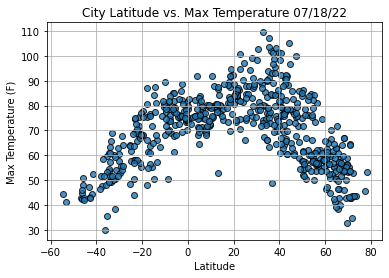

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

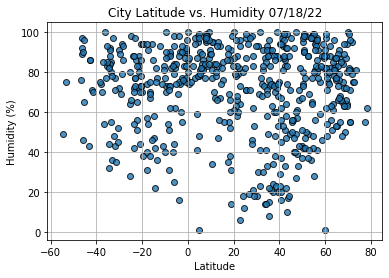

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

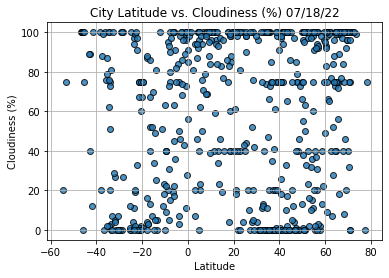

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

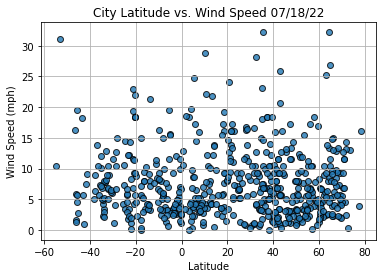

In [21]:


# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()